In [66]:
from IPython.display import clear_output, display
from time import sleep
import matplotlib.pyplot as plt

In [67]:
import numpy as np
from itertools import product

import softmax_helper
from importlib import reload
reload(softmax_helper)

<module 'softmax_helper' from '/Users/rahul/python_projects/gqp-takeda/notebooks/softmax_helper.py'>

In [68]:
import pandas as pd

label_info = pd.read_csv('../data/phase1/activity_labels.txt', delim_whitespace=True, header=None, index_col=False)
label_mapping = dict()

for index, row_data in label_info.iterrows():
    label_mapping.update({row_data[0]-1 : row_data[1]})

In [69]:
X_train = np.load('../data/phase1/train/X_train.npy')
Y_train = np.load('../data/phase1/train/Y_train.npy')
X_valid = np.load('../data/phase1/train/X_valid.npy')
Y_valid = np.load('../data/phase1/train/Y_valid.npy')
X_test  = np.load('../data/phase1/train/X_test.npy')
Y_test  = np.load('../data/phase1/train/Y_test.npy')

In [70]:
X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape, X_test.shape, Y_test.shape

((6213, 561), (6213, 12), (1554, 561), (1554, 12), (3162, 561), (3162, 12))

In [71]:
from keras.models import Sequential
from keras.layers import Dense

In [106]:
def plot_training(model):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(model.history.history['acc'])
    plt.plot(model.history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    
    
    plt.show()

In [73]:
model = Sequential()
model.add(Dense(20, input_dim=561, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(12, activation='sigmoid'))

In [74]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=16, verbose= False)

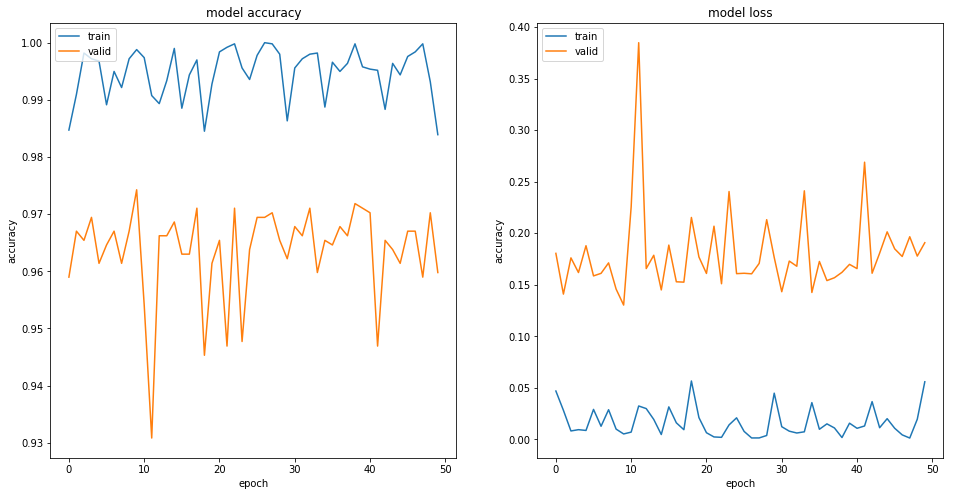

In [109]:
plot_training(model)

In [110]:
model.evaluate(X_valid, Y_valid)

1554/1554 [==============================] - 0s 71us/step


[0.12715615245766526, 0.9736164736164736]

In [80]:
from sklearn.metrics import classification_report, classification

In [87]:
def get_confusion_matrix(Y, Y_hat):
    report = classification_report(
        y_true=Y.argmax(axis=1),
        y_pred=Y_hat.argmax(axis=1),
        labels=list(label_mapping.keys()),
        target_names=list(label_mapping.values())
    )
    return report

In [94]:
print("Train Confusion Matrix\n", get_confusion_matrix(Y_train, model.predict(X_train)))
print("Validation Confusion Matrix\n", get_confusion_matrix(Y_valid, model.predict(X_valid)))

Train Confusion Matrix
                     precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00       971
  WALKING_UPSTAIRS       1.00      0.97      0.99       869
WALKING_DOWNSTAIRS       0.98      1.00      0.99       783
           SITTING       0.96      0.98      0.97      1030
          STANDING       0.98      0.96      0.97      1143
            LAYING       1.00      1.00      1.00      1129
      STAND_TO_SIT       0.92      0.87      0.89        38
      SIT_TO_STAND       0.79      1.00      0.88        19
        SIT_TO_LIE       0.87      0.96      0.92        57
        LIE_TO_SIT       0.84      0.96      0.89        53
      STAND_TO_LIE       1.00      0.86      0.93        73
      LIE_TO_STAND       0.93      0.77      0.84        48

         micro avg       0.98      0.98      0.98      6213
         macro avg       0.94      0.95      0.94      6213
      weighted avg       0.98      0.98      0.98      6213

Validation Co

In [115]:
model.get_weights

<bound method Network.get_weights of <keras.engine.sequential.Sequential object at 0x106db49e8>>

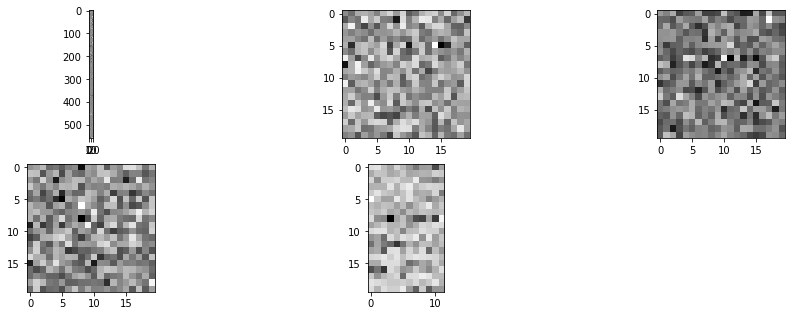

In [136]:
weight_params = [param for param in model.get_weights() if len(param.shape) == 2]

n_cols = 3
n_rows = round(len(weight_params)/3) + 1
plt.figure(figsize=(16, 8))
for idx, param in enumerate(weight_params):
    if len(param.shape) == 2:
        plt.subplot(n_rows, n_cols, idx +1)
        plt.imshow(param, cmap='gray')

1